In [1]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
from Bio import SeqIO
import numpy as np # linear algebra
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
dna = pd.read_table('/content/input.txt')
dna.head()

# """
# Classe 0: DENV1
# Classe 1: DENV2
# Classe 2: SARS-CoV-2
# Classe 3: HPV 16
# Classe 4: HPV 18
# Classe 5: PFLUV 4
# Classe 6: PFLUV 2
# """

,sequence,class
0,cgacagaaatccagacgtcaggaacgacaacaatcttcgcaggaca...,0
1,cgacagaaatccagacgtcaggaacgacaacaatcttcgcaggaca...,0
2,cgacagaaatccagacgtcaggaacgacaacaatcttcgcaggaca...,0
3,cgacagaaatccagacgtcaggaacgacaacaatcttcgcaggaca...,0
4,cgacagaaatccagacgtcaggaacgacaacaatcttcgcaggaca...,0


Text(0.5, 1.0, 'Class distribution of DNA')

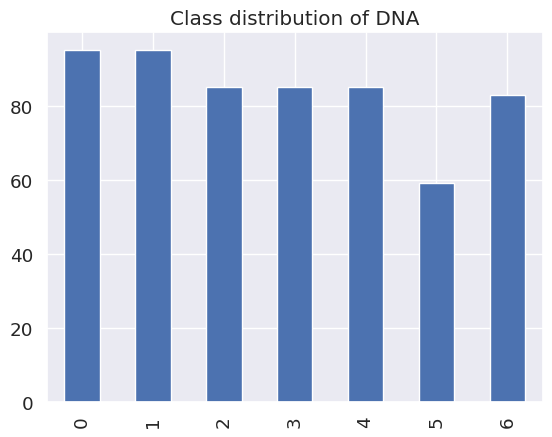

In [113]:
dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of DNA")

In [114]:
def Kmers_funct(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

#convert our training data sequences into short overlapping k-mers of length 6.
#Lets do that for each species of data we have using our Kmers_funct function.

dna['words'] = dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
dna = dna.drop('sequence', axis=1)

In [115]:
dna.head()

,class,words
0,0,"[cgacag, gacaga, acagaa, cagaaa, agaaat, gaaat..."
1,0,"[cgacag, gacaga, acagaa, cagaaa, agaaat, gaaat..."
2,0,"[cgacag, gacaga, acagaa, cagaaa, agaaat, gaaat..."
3,0,"[cgacag, gacaga, acagaa, cagaaa, agaaat, gaaat..."
4,0,"[cgacag, gacaga, acagaa, cagaaa, agaaat, gaaat..."


In [116]:
dna_texts = list(dna['words'])
for item in range(len(dna_texts)):
    dna_texts[item] = ' '.join(dna_texts[item])
#separate labels
y_dna = dna.iloc[:, 0].values

In [117]:
y_dna

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [118]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4)) #The n-gram size of 4 is previously determined by testing
X = cv.fit_transform(dna_texts)

In [119]:
print(X.shape)

(587, 2472)


In [120]:
# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y_dna,
                                                    test_size = 0.20,
                                                    random_state=42)

In [121]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [122]:
y_pred = classifier.predict(X_test)

In [123]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.983 
precision = 0.984 
recall = 0.983 
f1 = 0.983


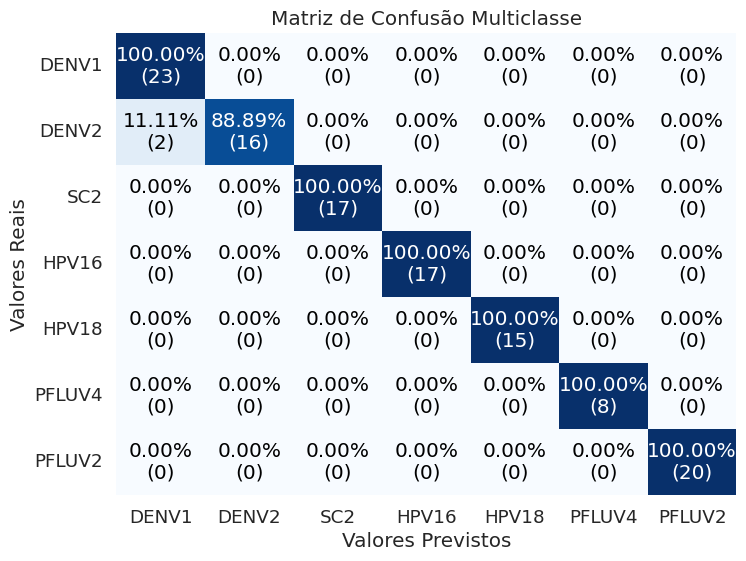

In [125]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def escolher_cor(valor):
  if valor >= 0.7:
    return "white"
  else:
    return "black"

labels = ["DENV1", "DENV2", "SC2", "HPV16", "HPV18", "PFLUV4", "PFLUV2"]

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix / np.sum(conf_matrix, axis=1, keepdims=True)

# Configuração do gráfico
class_names = labels
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=False, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names, cbar=False)
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix_percent[i, j]:.2%}\n({conf_matrix[i, j]})", ha="center", va="center", color=escolher_cor(conf_matrix_percent[i, j]))

plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão Multiclasse')
plt.show()